# WK8 Exploratory Data Analysis
<hr style = "border:2.5px solid #126782"></hr>

Name: **Annaliza T. Amar** <br>
Course: **CPE2A**

In [827]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [828]:
df = pd.read_csv(r"..\raw\chip-dataset-cleaned.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [829]:
df = df.drop(df.columns[[10,11,12]], axis= 1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


## N Chips Manufactured

In [830]:
df_w = df.copy()

In [831]:
chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [832]:
type(chip_count)

pandas.core.series.Series

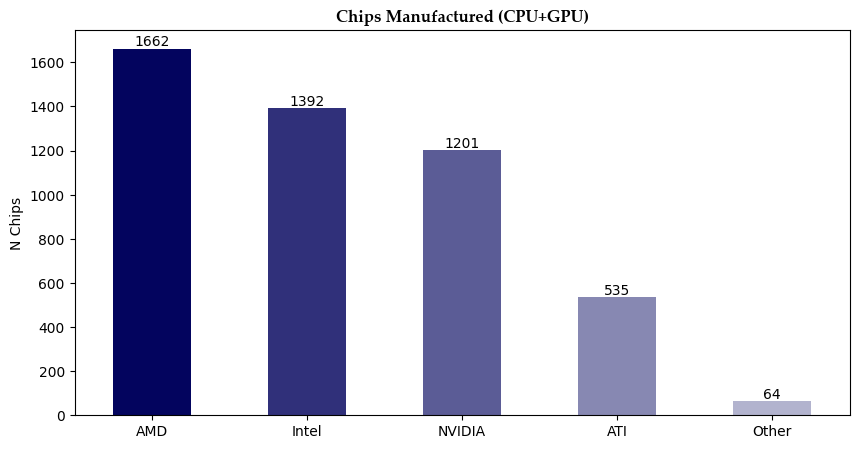

In [833]:
num_bars = 5
alphas = np.linspace(1, 0.3, num_bars)
colors = [(3/255, 4/255, 94/255, alpha) for alpha in alphas]

chart = chip_count.plot(kind='bar',
                        color = colors,
                        figsize = (10,5))
chart.bar_label(chart.containers[0], label_type = 'edge')
plt.title('Chips Manufactured (CPU+GPU)',
          fontfamily = 'Palatino Linotype',
          fontsize = 12,
          fontweight = 'bold')
plt.xlabel('')
chart.set_xticklabels(chip_count.index, rotation = 0)
plt.ylabel('N Chips')
plt.show()

## N CPU Manufactured

In [834]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [835]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

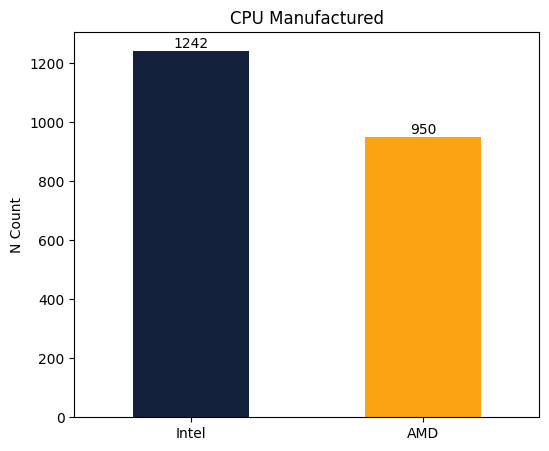

In [836]:
chart = cpu_count.plot(kind = 'bar', figsize=(6,5),
                       color =['#14213d','#fca311'])
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('CPU Manufactured')
plt.ylabel('N Count')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

## N GPU Manufactured

In [837]:
df_gpu = df_w[df_w['Type']=='GPU']
df_gpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
2192,Intel Xeon E3-1275,GPU,4/3/2011,32.0,95.000000,216.000000,1160.000000,100,Intel,Intel
2193,Matrox Parhelia 128 MB,GPU,6/25/2002,150.0,81.359981,174.000000,80.000000,200,UMC,Other
2194,NVIDIA GeForce MX150 GP107,GPU,2/23/2019,14.0,25.000000,132.000000,3300.000000,1469,Samsung,NVIDIA
2195,Intel GMA 500,GPU,3/2/2008,130.0,81.359981,188.440445,1929.922279,200,Intel,Intel
2196,ATI Radeon HD 4350 AGP,GPU,9/30/2008,55.0,20.000000,73.000000,242.000000,600,TSMC,ATI
...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2/22/2011,40.0,75.000000,332.000000,1950.000000,450,TSMC,NVIDIA
4850,Intel GMA 950,GPU,6/1/2005,90.0,7.000000,188.440445,1929.922279,250,Intel,Intel
4851,NVIDIA GeForce GT 320M,GPU,3/3/2010,40.0,23.000000,100.000000,486.000000,500,TSMC,NVIDIA
4852,NVIDIA GeForce FX 5200,GPU,3/6/2003,150.0,81.359981,65.000000,29.000000,250,TSMC,NVIDIA


In [838]:
gpu_count = df_gpu['Vendor'].value_counts()
gpu_count

Vendor
NVIDIA    1201
AMD        712
ATI        535
Intel      150
Other       64
Name: count, dtype: int64

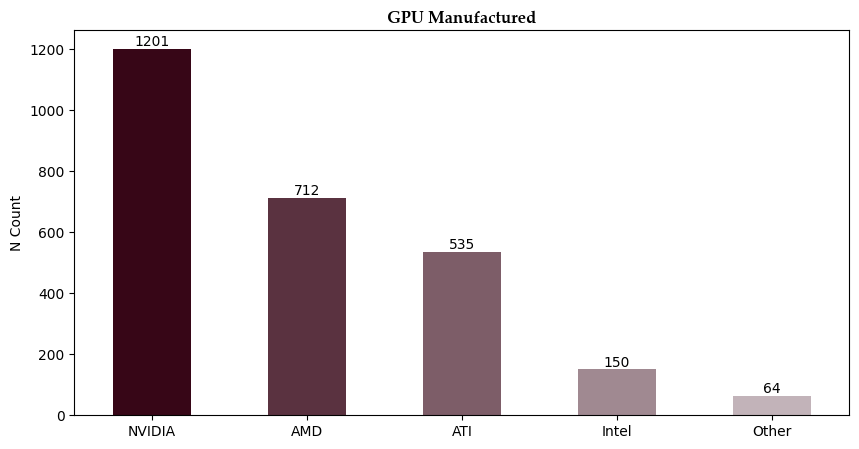

In [839]:
num_bars = 5
alphas = np.linspace(1, 0.3, num_bars)
colors = [(55/255, 6/255, 23/255, alpha) for alpha in alphas]

chart = gpu_count.plot(kind='bar',
                        color = colors,
                        figsize = (10,5))
chart.bar_label(chart.containers[0], label_type = 'edge')
plt.title('GPU Manufactured',
          fontfamily = 'Palatino Linotype',
          fontsize = 12,
          fontweight = 'bold')
plt.xlabel('')
chart.set_xticklabels(gpu_count.index, rotation = 0)
plt.ylabel('N Count')
plt.show()

## Lowest TDP (Thermal Design Power)

In [840]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [841]:
type(df_tdp)

pandas.core.frame.DataFrame

In [842]:
df_tdp = df_tdp.sort_values(by='TDP', ascending = True)
df_tdp

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
...,...,...
4605,NVIDIA Quadro Plex 2100 S4,640.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0


In [843]:
df_tdp = df_tdp.head(10)
df_tdp

,Product,TDP
2175,Intel Atom Z612,1.0
1964,Intel Atom Z600,1.0
469,Intel Atom Z620,1.0
1550,Intel Atom Z500,1.0
60,Intel Atom Z515,1.0
1761,Intel Atom Z610,1.0
1424,Intel Atom Z510,2.0
512,Intel Atom Z510PT,2.0
1877,Intel Atom Z510P,2.0
135,Intel Atom Z605,2.0


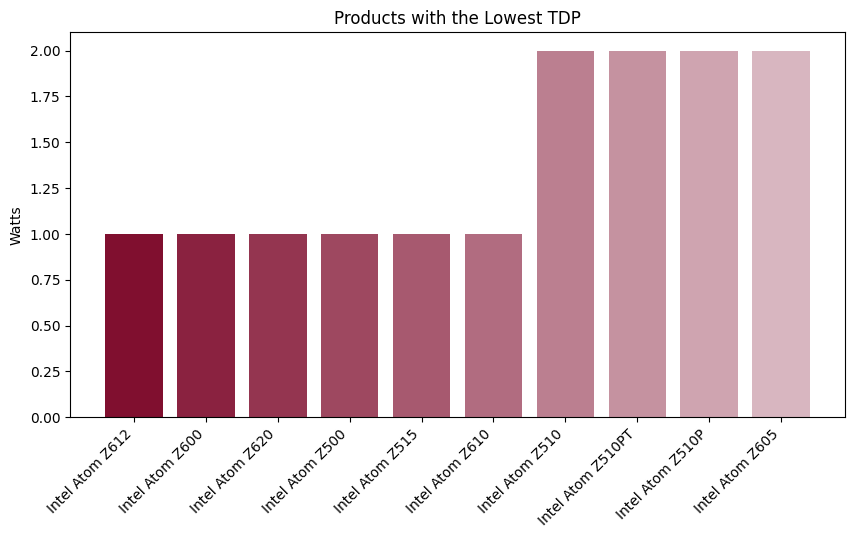

In [844]:
num_bars = 10
alphas = np.linspace(1, 0.3, num_bars)
colors = [(0.502, 0.0588, 0.1843, alpha) for alpha in alphas]

plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'], df_tdp['TDP'], color=colors)

plt.title('Products with the Lowest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

## Highest TDP (Thermal Design Power)

In [845]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [846]:
df_tdp = df_tdp.sort_values(by='TDP',ascending=False)
df_tdp

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
2908,NVIDIA Tesla S1075,800.0
4420,NVIDIA Quadro Plex 1000 Model II,640.0
...,...,...
1550,Intel Atom Z500,1.0
1761,Intel Atom Z610,1.0
469,Intel Atom Z620,1.0
2175,Intel Atom Z612,1.0


In [847]:
df_tdp = df_tdp.head(10)
df_tdp

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
2908,NVIDIA Tesla S1075,800.0
4420,NVIDIA Quadro Plex 1000 Model II,640.0
4735,NVIDIA Quadro Plex 2200 D2,640.0
2522,NVIDIA Quadro Plex 2100 D4,640.0
4605,NVIDIA Quadro Plex 2100 S4,640.0
3788,NVIDIA Quadro Plex 7000,600.0
2790,NVIDIA Quadro Plex 2200 S4,600.0


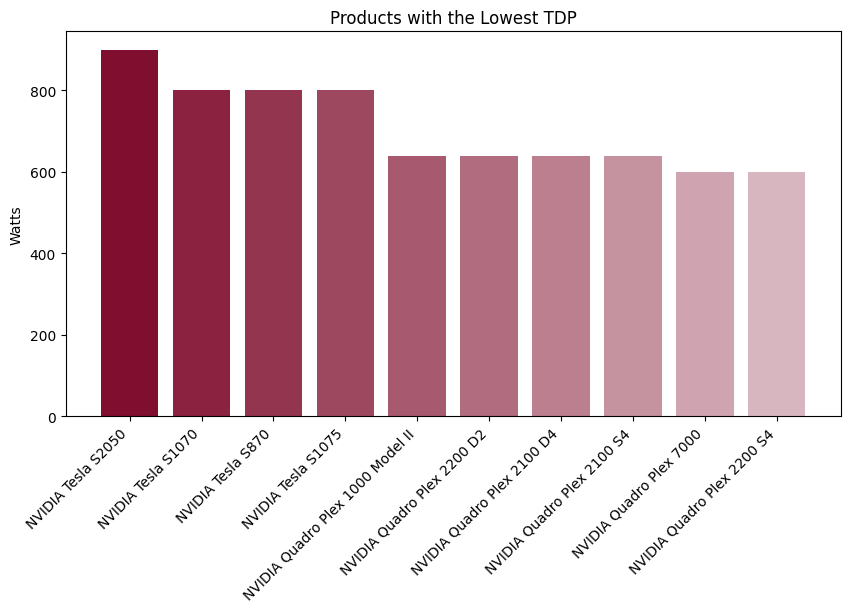

In [848]:
num_bars = 10
alphas = np.linspace(1, 0.3, num_bars)
colors = [(0.502, 0.0588, 0.1843, alpha) for alpha in alphas]

plt.figure(figsize=(10,5))
plt.bar(df_tdp['Product'], df_tdp['TDP'], color=colors)

plt.title('Products with the Lowest TDP')
plt.ylabel('Watts')
plt.xticks(rotation=45, ha='right')
plt.show()

## CPU and GPU Process Size Trend

### GPU Process Size Trend

In [849]:
df_gpups = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_gpups

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [850]:
df_gpups['Date'] = pd.to_datetime(df_gpups['Date'])
df_gpups['Year'] = df_gpups['Date'].dt.year
df_gpups

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [851]:
df_gpups = df_gpups.groupby('Year')['Process_Size'].mean().reset_index()
df_gpups

,Year,Process_Size
0,2000.0,189.642857
1,2001.0,165.000000
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.740385


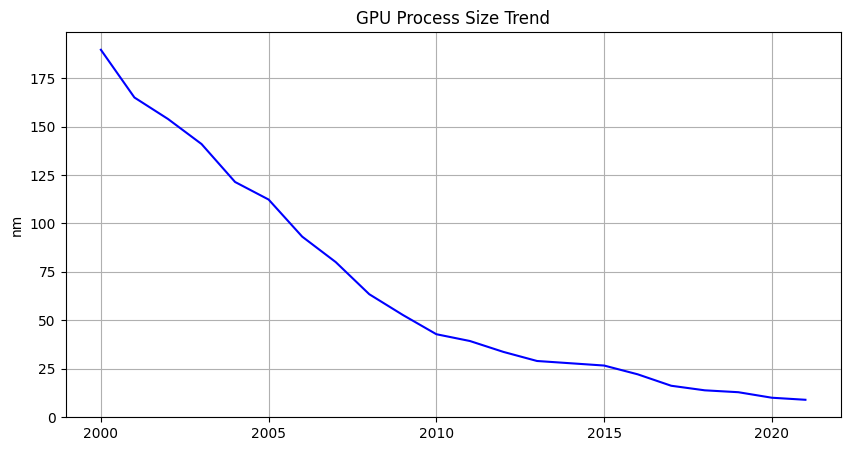

In [852]:
plt.figure(figsize=(10,5))
plt.plot(df_gpups['Year'],df_gpups['Process_Size'], color='blue')
plt.title('GPU Process Size Trend')
plt.ylabel('nm')
plt.grid()
plt.show()

### CPU Process Size Trend

In [853]:
df_cpups = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_cpups

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [854]:
df_cpups['Date'] = pd.to_datetime(df_cpups['Date'])
df_cpups['Year'] = df_cpups['Date'].dt.year
df_cpups 

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [855]:
df_cpups = df_cpups.groupby('Year')['Process_Size'].mean().reset_index()
df_cpups

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


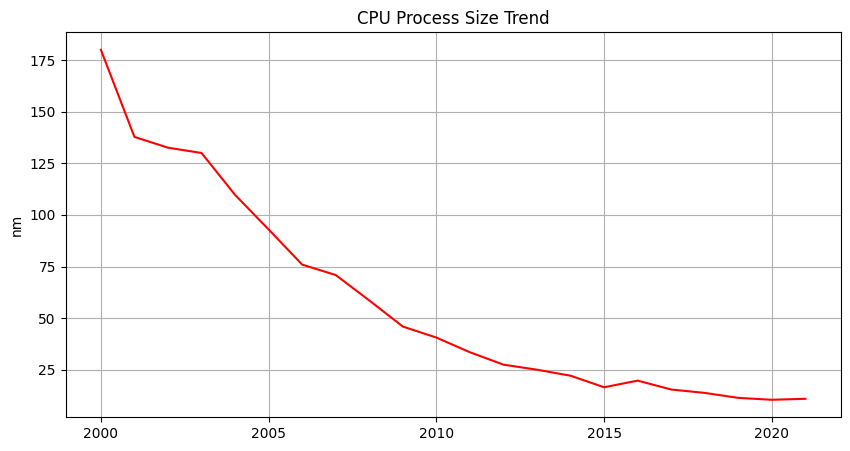

In [856]:
plt.figure(figsize=(10,5))
plt.plot(df_cpups['Year'],df_cpups['Process_Size'], color='red')
plt.title('CPU Process Size Trend')
plt.ylabel('nm')
plt.grid()
plt.show()

## CPU and GPU Process Size Trend Comparison

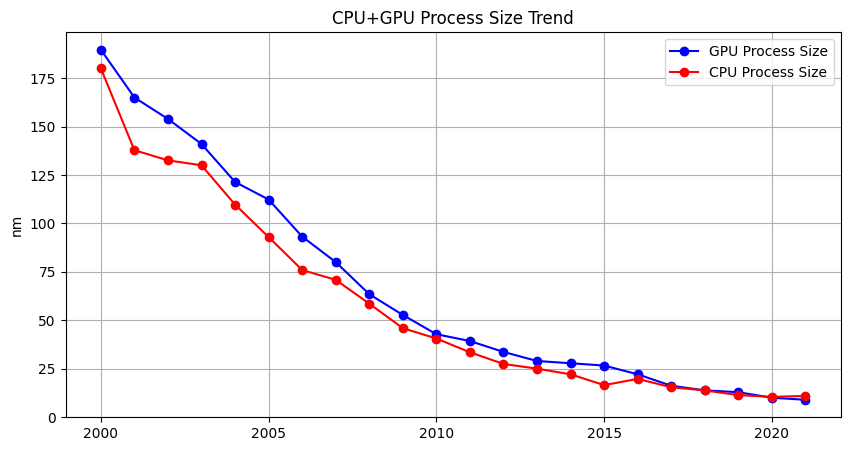

In [857]:
plt.figure(figsize=(10,5))
plt.plot(df_gpups['Year'],df_gpups['Process_Size'], color='blue',marker='o', label="GPU Process Size")
plt.plot(df_cpups['Year'],df_cpups['Process_Size'], color='red',marker='o', label="CPU Process Size")
plt.title('CPU+GPU Process Size Trend')
plt.legend()
plt.grid()
plt.ylabel('nm')
plt.show()

The graph shows a steady decline in CPU and GPU process sizes from around 180 nm in 2000 to below 10 nm by 2020, highlighting advancements in semiconductor technology. Initially, GPUs had larger process sizes, but both trends converged over time. The continuous reduction in size has led to improved performance and efficiency. However, since 2015, the decline has slowed, indicating increasing challenges in further shrinking transistor sizes.

## CPU and GPU TDP Trend

### CPU TDP Trend

In [858]:
df_cputdp = df_w[['Type','Date','TDP']].where(df_w['Type']=='CPU').dropna()
df_cputdp

,Type,Date,TDP
0,CPU,2/20/2007,45.0
1,CPU,9/6/2018,35.0
2,CPU,9/2/2020,28.0
3,CPU,9/1/2013,80.0
4,CPU,5/3/2011,125.0
...,...,...,...
2187,CPU,4/6/2021,185.0
2188,CPU,3/16/2020,54.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,85.0


In [859]:
df_cputdp['Date'] = pd.to_datetime(df_cputdp['Date'])
df_cputdp['Year'] = df_cputdp['Date'].dt.year
df_cputdp 

,Type,Date,TDP,Year
0,CPU,2007-02-20,45.0,2007.0
1,CPU,2018-09-06,35.0,2018.0
2,CPU,2020-09-02,28.0,2020.0
3,CPU,2013-09-01,80.0,2013.0
4,CPU,2011-05-03,125.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,185.0,2021.0
2188,CPU,2020-03-16,54.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,85.0,2004.0


In [860]:
df_cputdp = df_cputdp.groupby('Year')['TDP'].mean().reset_index()
df_cputdp

,Year,TDP
0,2000.0,50.470588
1,2001.0,59.186047
2,2002.0,68.487179
3,2003.0,73.630137
4,2004.0,78.250000
5,2005.0,79.525974
6,2006.0,72.822222
7,2007.0,56.608696
8,2008.0,63.589286
9,2009.0,74.426087


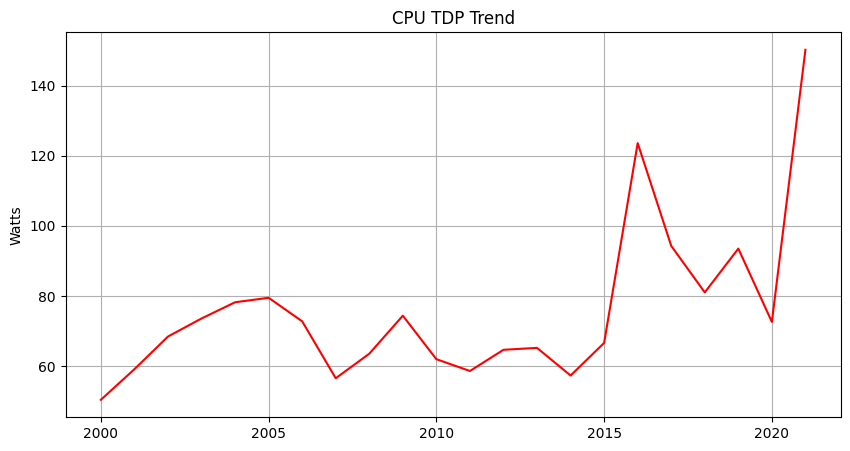

In [861]:
plt.figure(figsize=(10,5))
plt.plot(df_cputdp['Year'],df_cputdp['TDP'], color='red')
plt.title('CPU TDP Trend')
plt.ylabel('Watts')
plt.grid()
plt.show()

### GPU TDP Trend

In [862]:
df_gputdp = df_w[['Type','Date','TDP']].where(df_w['Type']=='GPU').dropna()
df_gputdp

,Type,Date,TDP
2192,GPU,4/3/2011,95.000000
2193,GPU,6/25/2002,81.359981
2194,GPU,2/23/2019,25.000000
2195,GPU,3/2/2008,81.359981
2196,GPU,9/30/2008,20.000000
...,...,...,...
4849,GPU,2/22/2011,75.000000
4850,GPU,6/1/2005,7.000000
4851,GPU,3/3/2010,23.000000
4852,GPU,3/6/2003,81.359981


In [863]:
df_gputdp['Date'] = pd.to_datetime(df_gputdp['Date'])
df_gputdp['Year'] = df_gputdp['Date'].dt.year
df_gputdp 

,Type,Date,TDP,Year
2192,GPU,2011-04-03,95.000000,2011.0
2193,GPU,2002-06-25,81.359981,2002.0
2194,GPU,2019-02-23,25.000000,2019.0
2195,GPU,2008-03-02,81.359981,2008.0
2196,GPU,2008-09-30,20.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,75.000000,2011.0
4850,GPU,2005-06-01,7.000000,2005.0
4851,GPU,2010-03-03,23.000000,2010.0
4852,GPU,2003-03-06,81.359981,2003.0


In [864]:
df_gputdp = df_gputdp.groupby('Year')['TDP'].mean().reset_index()
df_gputdp

,Year,TDP
0,2000.0,55.258657
1,2001.0,65.297946
2,2002.0,75.419693
3,2003.0,69.121414
4,2004.0,68.908296
5,2005.0,75.262725
6,2006.0,63.032552
7,2007.0,69.652653
8,2008.0,95.534565
9,2009.0,73.114337


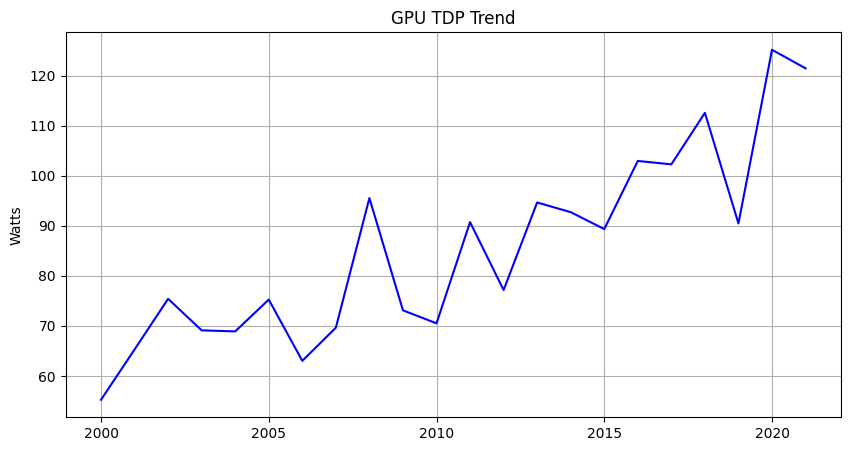

In [865]:
plt.figure(figsize=(10,5))
plt.plot(df_gputdp['Year'],df_gputdp['TDP'], color='blue')
plt.title('GPU TDP Trend')
plt.ylabel('Watts')
plt.grid()
plt.show()

## CPU and GPU TDP Trend Comparison

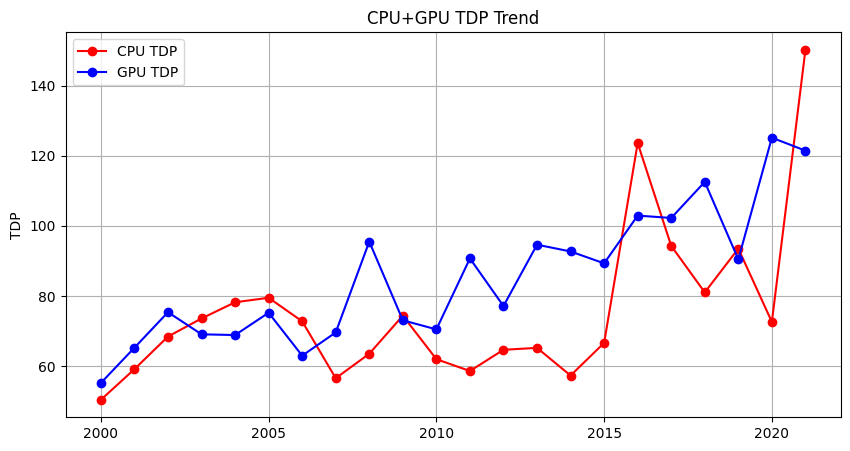

In [866]:
plt.figure(figsize=(10,5))
plt.plot(df_cputdp['Year'],df_cputdp['TDP'], color='red',marker='o', label="CPU TDP")
plt.plot(df_gputdp['Year'],df_gputdp['TDP'], color='blue',marker='o', label="GPU TDP")
plt.title('CPU+GPU TDP Trend')
plt.legend()
plt.grid()
plt.ylabel('TDP')
plt.show()

The graph shows the CPU and GPU TDP (Thermal Design Power) trends from 2000 to 2022. Both CPU and GPU TDP values have generally increased over time, with GPUs experiencing a more consistent upward trend. CPU TDP remained relatively stable from 2005 to 2015, fluctuating around 60–80 W, before rising sharply after 2015, peaking above 140 W in 2022. GPU TDP followed a steadier growth pattern, surpassing 100 W after 2015 and reaching over 120 W by 2022. This indicates that both CPUs and GPUs have become more power-intensive, likely due to increased performance demands and architectural advancements.

## CPU and GPU Die Size Trend

### CPU Die Size Trend

In [867]:
df_dscpu = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='CPU').dropna()
df_dscpu

,Type,Date,Die_Size
0,CPU,2/20/2007,77.000000
1,CPU,9/6/2018,192.000000
2,CPU,9/2/2020,188.440445
3,CPU,9/1/2013,160.000000
4,CPU,5/3/2011,258.000000
...,...,...,...
2187,CPU,4/6/2021,188.440445
2188,CPU,3/16/2020,156.000000
2189,CPU,7/1/2007,143.000000
2190,CPU,12/1/2004,188.440445


In [868]:
df_dscpu['Date'] = pd.to_datetime(df_dscpu['Date'])
df_dscpu['Year'] = df_dscpu['Date'].dt.year
df_dscpu 

,Type,Date,Die_Size,Year
0,CPU,2007-02-20,77.000000,2007.0
1,CPU,2018-09-06,192.000000,2018.0
2,CPU,2020-09-02,188.440445,2020.0
3,CPU,2013-09-01,160.000000,2013.0
4,CPU,2011-05-03,258.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,188.440445,2021.0
2188,CPU,2020-03-16,156.000000,2020.0
2189,CPU,2007-07-01,143.000000,2007.0
2190,CPU,2004-12-01,188.440445,2004.0


In [869]:
df_dscpu = df_dscpu.groupby('Year')['Die_Size'].mean().reset_index()
df_dscpu

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


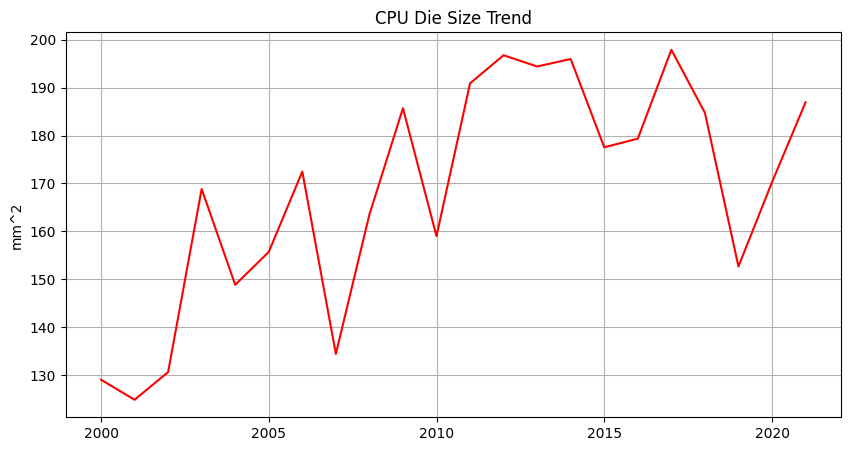

In [870]:
plt.figure(figsize=(10,5))
plt.plot(df_dscpu['Year'],df_dscpu['Die_Size'], color='red')
plt.title('CPU Die Size Trend')
plt.ylabel('mm^2')
plt.grid()
plt.show()

### GPU Die Size Trend

In [871]:
df_dsgpu = df_w[['Type','Date','Die_Size']].where(df_w['Type']=='GPU').dropna()
df_dsgpu

,Type,Date,Die_Size
2192,GPU,4/3/2011,216.000000
2193,GPU,6/25/2002,174.000000
2194,GPU,2/23/2019,132.000000
2195,GPU,3/2/2008,188.440445
2196,GPU,9/30/2008,73.000000
...,...,...,...
4849,GPU,2/22/2011,332.000000
4850,GPU,6/1/2005,188.440445
4851,GPU,3/3/2010,100.000000
4852,GPU,3/6/2003,65.000000


In [872]:
df_dsgpu['Date'] = pd.to_datetime(df_dsgpu['Date'])
df_dsgpu['Year'] = df_dsgpu['Date'].dt.year
df_dsgpu 

,Type,Date,Die_Size,Year
2192,GPU,2011-04-03,216.000000,2011.0
2193,GPU,2002-06-25,174.000000,2002.0
2194,GPU,2019-02-23,132.000000,2019.0
2195,GPU,2008-03-02,188.440445,2008.0
2196,GPU,2008-09-30,73.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,332.000000,2011.0
4850,GPU,2005-06-01,188.440445,2005.0
4851,GPU,2010-03-03,100.000000,2010.0
4852,GPU,2003-03-06,65.000000,2003.0


In [873]:
df_dsgpu = df_dsgpu.groupby('Year')['Die_Size'].mean().reset_index()
df_dsgpu

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


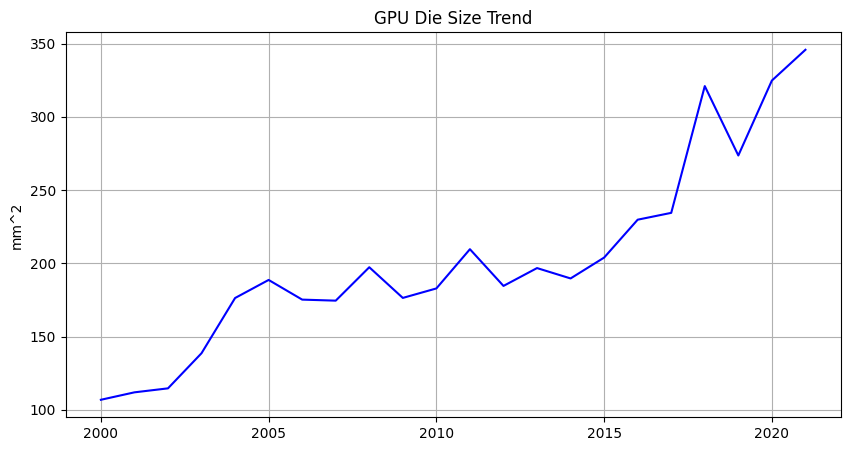

In [874]:
plt.figure(figsize=(10,5))
plt.plot(df_dsgpu['Year'],df_dsgpu['Die_Size'], color='blue')
plt.title('GPU Die Size Trend')
plt.ylabel('mm^2')
plt.grid()
plt.show()

## Graph Comparison of CPU and GPU Die Size Trend

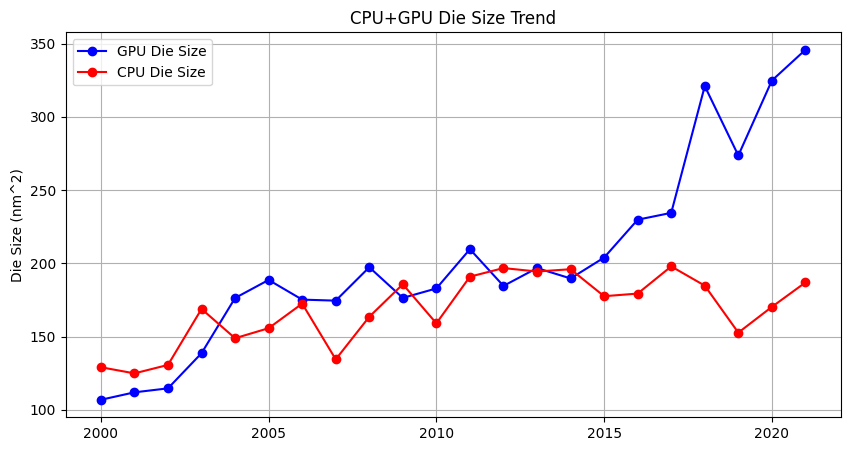

In [875]:
plt.figure(figsize=(10,5))
plt.plot(df_dsgpu['Year'],df_dsgpu['Die_Size'], color='blue',marker='o', label="GPU Die Size")
plt.plot(df_dscpu['Year'],df_dscpu['Die_Size'], color='red',marker='o', label="CPU Die Size")
plt.title('CPU+GPU Die Size Trend')
plt.legend()
plt.ylabel('Die Size (nm^2)')
plt.grid()
plt.show()

The graph shows the CPU and GPU die size trends from 2000 to 2022. Initially, both CPU and GPU die sizes ranged between 100 nm^2 and 150 nm^2, but over time, GPU die sizes increased significantly. Around 2016, GPU die sizes surpassed 200 nm^2, reaching nearly 350 nm^2 by 2022, while CPU die sizes remained relatively stable, fluctuating between 150 nm^2 and 200 nm^2. This suggests that GPU architectures have become larger and more complex, while CPU die sizes have experienced smaller variations over the years.

## CPU and GPU Transistor Count

### CPU Transistor Count

In [876]:
df_tccpu = df_w[['Type','Date','Transistors']].where(df_w['Type']=='CPU').dropna()
df_tccpu

,Type,Date,Transistors
0,CPU,2/20/2007,122.000000
1,CPU,9/6/2018,4800.000000
2,CPU,9/2/2020,1929.922279
3,CPU,9/1/2013,1400.000000
4,CPU,5/3/2011,758.000000
...,...,...,...
2187,CPU,4/6/2021,1929.922279
2188,CPU,3/16/2020,9800.000000
2189,CPU,7/1/2007,291.000000
2190,CPU,12/1/2004,106.000000


In [877]:
df_tccpu['Date'] = pd.to_datetime(df_tccpu['Date'])
df_tccpu['Year'] = df_tccpu['Date'].dt.year
df_tccpu 

,Type,Date,Transistors,Year
0,CPU,2007-02-20,122.000000,2007.0
1,CPU,2018-09-06,4800.000000,2018.0
2,CPU,2020-09-02,1929.922279,2020.0
3,CPU,2013-09-01,1400.000000,2013.0
4,CPU,2011-05-03,758.000000,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,1929.922279,2021.0
2188,CPU,2020-03-16,9800.000000,2020.0
2189,CPU,2007-07-01,291.000000,2007.0
2190,CPU,2004-12-01,106.000000,2004.0


In [878]:
df_tccpu = df_tccpu.groupby('Year')['Transistors'].mean().reset_index()
df_tccpu

,Year,Transistors
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


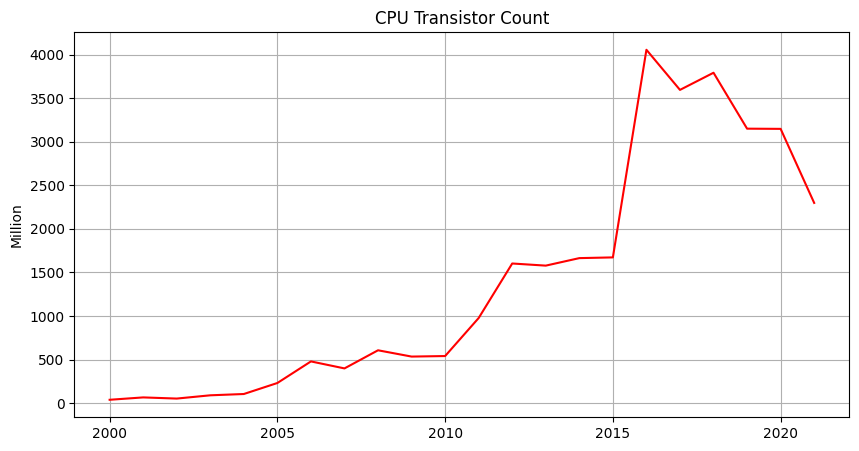

In [879]:
plt.figure(figsize=(10,5))
plt.plot(df_tccpu['Year'],df_tccpu['Transistors'], color='red')
plt.title('CPU Transistor Count')
plt.ylabel('Million')
plt.grid()
plt.show()

### GPU Transistor Count

In [880]:
df_tcgpu = df_w[['Type','Date','Transistors']].where(df_w['Type']=='GPU').dropna()
df_tcgpu

,Type,Date,Transistors
2192,GPU,4/3/2011,1160.000000
2193,GPU,6/25/2002,80.000000
2194,GPU,2/23/2019,3300.000000
2195,GPU,3/2/2008,1929.922279
2196,GPU,9/30/2008,242.000000
...,...,...,...
4849,GPU,2/22/2011,1950.000000
4850,GPU,6/1/2005,1929.922279
4851,GPU,3/3/2010,486.000000
4852,GPU,3/6/2003,29.000000


In [881]:
df_tcgpu['Date'] = pd.to_datetime(df_tcgpu['Date'])
df_tcgpu['Year'] = df_tcgpu['Date'].dt.year
df_tcgpu 

,Type,Date,Transistors,Year
2192,GPU,2011-04-03,1160.000000,2011.0
2193,GPU,2002-06-25,80.000000,2002.0
2194,GPU,2019-02-23,3300.000000,2019.0
2195,GPU,2008-03-02,1929.922279,2008.0
2196,GPU,2008-09-30,242.000000,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,2011.0
4850,GPU,2005-06-01,1929.922279,2005.0
4851,GPU,2010-03-03,486.000000,2010.0
4852,GPU,2003-03-06,29.000000,2003.0


In [882]:
df_tcgpu = df_tcgpu.groupby('Year')['Transistors'].mean().reset_index()
df_tcgpu

,Year,Transistors
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


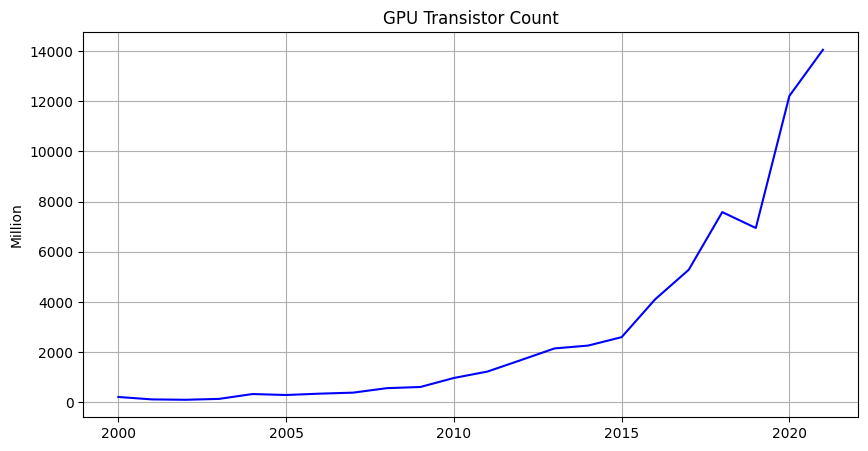

In [883]:
plt.figure(figsize=(10,5))
plt.plot(df_tcgpu['Year'],df_tcgpu['Transistors'], color='blue')
plt.title('GPU Transistor Count')
plt.ylabel('Million')
plt.grid()
plt.show()

## Graph Comparison of CPU and GPU Transistor Count

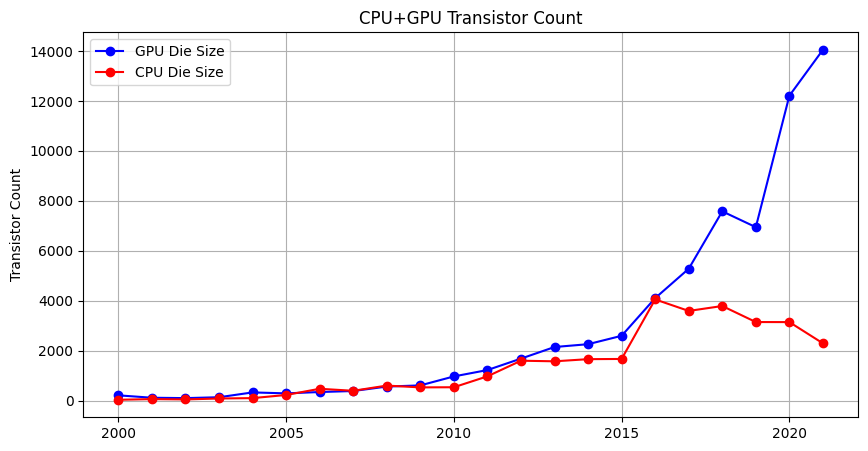

In [884]:
plt.figure(figsize=(10,5))
plt.plot(df_tcgpu['Year'],df_tcgpu['Transistors'], color='blue',marker='o', label="GPU Die Size")
plt.plot(df_tccpu['Year'],df_tccpu['Transistors'], color='red',marker='o', label="CPU Die Size")
plt.title('CPU+GPU Transistor Count')
plt.legend()
plt.ylabel('Transistor Count')

plt.grid(True)
plt.show()

The graph shows the transistor count of CPUs and GPUs over time, with GPUs experiencing a rapid increase, especially after 2015, reaching over 14,000 million transistors by the early 2020s, while CPUs have grown more gradually, peaking in the late 2010s before slightly declining. Around 2015, GPUs saw a sharp rise, surpassing CPUs significantly, highlighting the faster advancements in GPU transistor density compared to CPUs in recent years.

## CPU and GPU Frequency Trend

### CPU Frequency Trend

In [885]:
df_fcpu = df_w[['Type','Date','Frequency']].where(df_w['Type']=='CPU').dropna()
df_fcpu

,Type,Date,Frequency
0,CPU,2/20/2007,2200.0
1,CPU,9/6/2018,3200.0
2,CPU,9/2/2020,2600.0
3,CPU,9/1/2013,1800.0
4,CPU,5/3/2011,3700.0
...,...,...,...
2187,CPU,4/6/2021,2400.0
2188,CPU,3/16/2020,3300.0
2189,CPU,7/1/2007,2333.0
2190,CPU,12/1/2004,2000.0


In [886]:
df_fcpu['Date'] = pd.to_datetime(df_fcpu['Date'])
df_fcpu['Year'] = df_fcpu['Date'].dt.year
df_fcpu 

,Type,Date,Frequency,Year
0,CPU,2007-02-20,2200.0,2007.0
1,CPU,2018-09-06,3200.0,2018.0
2,CPU,2020-09-02,2600.0,2020.0
3,CPU,2013-09-01,1800.0,2013.0
4,CPU,2011-05-03,3700.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,2400.0,2021.0
2188,CPU,2020-03-16,3300.0,2020.0
2189,CPU,2007-07-01,2333.0,2007.0
2190,CPU,2004-12-01,2000.0,2004.0


In [887]:
df_fcpu = df_fcpu.groupby('Year')['Frequency'].mean().reset_index()
df_fcpu

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


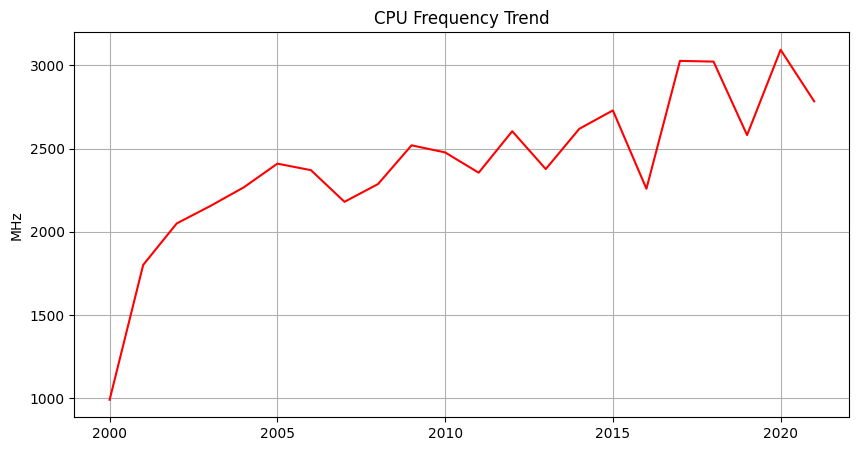

In [888]:
plt.figure(figsize=(10,5))
plt.plot(df_fcpu['Year'],df_fcpu['Frequency'], color='red')
plt.title('CPU Frequency Trend')
plt.ylabel('MHz')
plt.grid()
plt.show()

### GPU Frequency Trend

In [889]:
df_fgpu = df_w[['Type','Date','Frequency']].where(df_w['Type']=='GPU').dropna()
df_fgpu

,Type,Date,Frequency
2192,GPU,4/3/2011,100.0
2193,GPU,6/25/2002,200.0
2194,GPU,2/23/2019,1469.0
2195,GPU,3/2/2008,200.0
2196,GPU,9/30/2008,600.0
...,...,...,...
4849,GPU,2/22/2011,450.0
4850,GPU,6/1/2005,250.0
4851,GPU,3/3/2010,500.0
4852,GPU,3/6/2003,250.0


In [890]:
df_fgpu['Date'] = pd.to_datetime(df_fgpu['Date'])
df_fgpu['Year'] = df_fgpu['Date'].dt.year
df_fgpu 

,Type,Date,Frequency,Year
2192,GPU,2011-04-03,100.0,2011.0
2193,GPU,2002-06-25,200.0,2002.0
2194,GPU,2019-02-23,1469.0,2019.0
2195,GPU,2008-03-02,200.0,2008.0
2196,GPU,2008-09-30,600.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,450.0,2011.0
4850,GPU,2005-06-01,250.0,2005.0
4851,GPU,2010-03-03,500.0,2010.0
4852,GPU,2003-03-06,250.0,2003.0


In [891]:
df_fgpu = df_fgpu.groupby('Year')['Frequency'].mean().reset_index()
df_fgpu

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


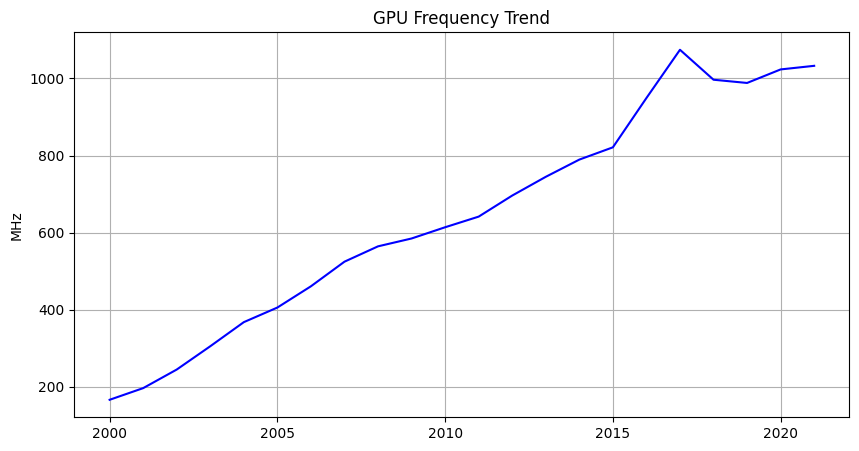

In [892]:
plt.figure(figsize=(10,5))
plt.plot(df_fgpu['Year'],df_fgpu['Frequency'], color='blue')
plt.title('GPU Frequency Trend')
plt.ylabel('MHz')
plt.grid()
plt.show()

## CPU and GPU Frequency Trend Comparison

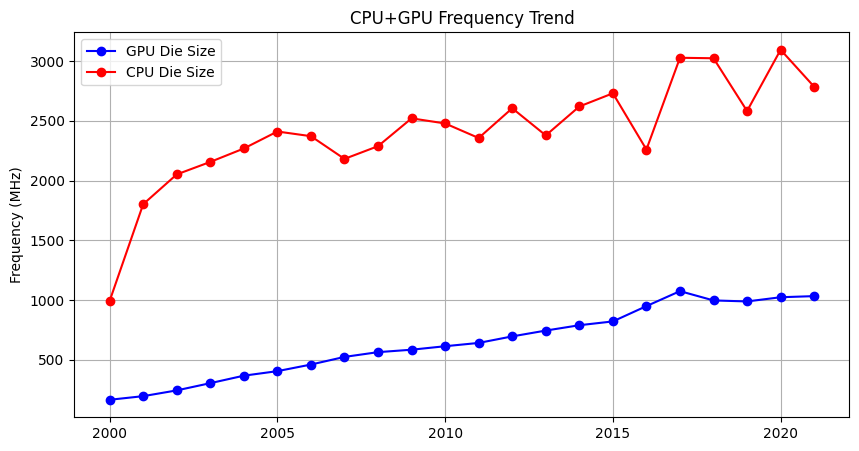

In [893]:
plt.figure(figsize=(10,5))
plt.plot(df_fgpu['Year'],df_fgpu['Frequency'], color='blue',marker='o', label="GPU Die Size")
plt.plot(df_fcpu['Year'],df_fcpu['Frequency'], color='red',marker='o', label="CPU Die Size")
plt.title('CPU+GPU Frequency Trend')
plt.legend()
plt.ylabel('Frequency (MHz)')

plt.grid(True)
plt.show()

The graph shows that CPU frequency increased rapidly from 1,000 MHz in 2000 to around 2,500 MHz by the mid-2000s but has since fluctuated between 2,500 and 3,000 MHz, indicating that CPU speed has largely plateaued. This is due to power and heat limitations, leading modern CPUs to focus on efficiency, multi-core designs, and better processing rather than just higher clock speeds. Meanwhile, GPUs started at a much lower frequency, below 200 MHz in 2000, but have steadily increased, surpassing 1,000 MHz in the late 2010s. Although GPUs are still slower in raw frequency, they rely more on parallel processing with many cores to boost performance. This shift shows that modern computing improvements come from better architecture and multi-core efficiency rather than just increasing clock speeds.